# Results for local code

# 0. Load libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import math
import seaborn as sns
import os
import pickle
#%matplotlib inline

# Create variables to store

In [196]:
recalculate_if_saved = False
repetitions = 8
number_of_updates = 150
algorithm_list = ['causal', 'corrective', 'standard', 'preventive']
types_list = ['concurrent', 'sequential']
delay_list = ['1', '100', '1000']
repetition_probability_list = ['0', '5', '10']
negation_probability_list = ['0', '5', '10']

index_list = []
for i in range(150, 3150, 150):
    index_list.append(i)

file_path = 'local/test/results_experiment_'
columns_metrics = ['inconsistencies', 'messages_sent', 'latency_per_operation', 'overhead_data_structure', 'overhead_per_message', 'number_of_reconfigurations', 'total_reconfiguration_time']
file_path_images = '/images/'
current_directory = os.getcwd()

In [197]:
def create_empty_data():
    data = dict()
    string_name = 'data_frame'
            
    for alg in algorithm_list:
        for ty in types_list:
            for dela in delay_list:
                for rep in repetition_probability_list:
                    for neg in negation_probability_list:
                        var_name = string_name +'_' + alg + '_' + ty +'_delay_' + str(dela) + '_repetition_' + str(rep) + '_negation_' + str(neg)
                        data[var_name] = pd.DataFrame(columns=columns_metrics, index=index_list)    
    return data

In [198]:
dataframe_data = create_empty_data()

In [199]:
def add_result(value, data):
    var_name = 'data_frame' + '_' + data['algorithm'] + '_' + data['alg_type'] + '_delay_' + data['delay'] + '_repetition_' + data['repetition'] + '_negation_' + data['negation']
    var = dataframe_data[var_name] 
    var.loc[data['update']] = value

In [200]:
def save_all_dataframes_as_pickle():
    print('Saving....')
    current_directory = os.getcwd()
    path_results = '/saved_dataframes/'
    string_name = 'data_frame'
            
    for alg in algorithm_list:
        for ty in types_list:
            for dela in delay_list:
                for rep in repetition_probability_list:
                    for neg in negation_probability_list:
                            var_name = string_name +'_' + alg + '_' + ty +'_delay_' + str(dela) + '_repetition_' + str(rep) + '_negation_' + str(neg)
                            var = dataframe_data[var_name] 
                            pickle.dump(var, open(current_directory + path_results + var_name +'.p' , "wb"))
    pickle.dump(dataframe_data, open(current_directory + path_results + '/single_value/dataframe_data.p' , 'wb'))
    print(dataframe_data)                    
    print('Saved!')

In [201]:
def calculate_values():
    new_number = number_of_updates
    for repetition_index in range(0, repetitions):
        file_path = 'local/test/results_experiment_' + str(new_number)
        data = dict()
        data['update'] = number_of_updates * (repetition_index + 1)
        for delay in delay_list:
            data['delay'] = delay
            for repetition_probability in repetition_probability_list:
                data['repetition'] = repetition_probability
                for negation_probability in negation_probability_list:
                    data['negation'] = negation_probability
                    for algorithm in algorithm_list:
                        data['algorithm'] = algorithm
                        for alg_type in types_list:  
                            data['alg_type'] = alg_type
                            str_1 = 'result_algorithm_*' + algorithm + '*_type_*' + alg_type + '*_negationProbability_*' + str(negation_probability)
                            str_2 = '*_delay_*' + str(delay) + '.0*_repetitionProbability_*' + str(repetition_probability) + '*.csv'
                            file_name = str_1 + str_2
                            try:
                                result = pd.read_csv(file_path +'/' + file_name, encoding='utf-8', sep=r'\s*,\s*', header=0, engine='python')
                                mean_vector = result.mean(axis=0)
                                add_result(mean_vector, data)                                
                            except FileNotFoundError as e:
                                print(e)

        new_number += number_of_updates
    save_all_dataframes_as_pickle()

In [202]:
def load_values():
    print('Loading...')
    path_results = '/saved_dataframes/'
    current_directory = os.getcwd()
    loaded_data = pickle.load(open(current_directory + path_results + '/single_value/dataframe_data.p' , 'rb'))
    print('Loaded!')
    return loaded_data

In [203]:
if recalculate_if_saved:
    calculate_values()
else:
    dataframe_data = load_values()
#     print(dataframe_data)

Loading...
Loaded!


# Plot result first extra repetitions

In [204]:
my_index = dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_10_negation_10'].index
# my_results = []
# my_metric = 'number_of_reconfigurations'
# my_string_concurrent = 'data_frame_corrective_concurrent_delay_1000'
# my_string_preventive = 'data_frame_preventive_concurrent_delay_1000'
# my_string_standard = 'data_frame_standard_concurrent_delay_1000'


# for neg in negation_probability_list:
#     str_neg = '_negation_' + str(neg)
#     for rep in repetition_probability_list:
#         str_rep = '_repetition_' + str(rep)
#         my_new_string = my_string + str_rep + str_neg
#         corrective_name = 'y_corrective_' + str(rep)
#         preventive_name = 'y_preventive_' + str(rep)
#         standard_name = 'y_standard_' + str(rep)


# df_1000_10=pd.DataFrame({'x_values': my_index,
#                  'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_10_negation_10']['number_of_reconfigurations'], 
#                  'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_10_negation_10']['number_of_reconfigurations'], 
#                  'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_10_negation_10']['number_of_reconfigurations'], 
#                  'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_5_negation_10']['number_of_reconfigurations'], 
#                  'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_5_negation_10']['number_of_reconfigurations'], 
#                  'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_5_negation_10']['number_of_reconfigurations'],
#                  'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_0_negation_10']['number_of_reconfigurations'], 
#                  'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_0_negation_10']['number_of_reconfigurations'], 
#                  'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_0_negation_10']['number_of_reconfigurations'] 
#                 })

        
df_1000_10=pd.DataFrame({'x_values': my_index,
                 'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_10_negation_10']['number_of_reconfigurations'], 
                 'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_10_negation_10']['number_of_reconfigurations'], 
                 'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_10_negation_10']['number_of_reconfigurations'], 
                 'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_5_negation_10']['number_of_reconfigurations'], 
                 'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_5_negation_10']['number_of_reconfigurations'], 
                 'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_5_negation_10']['number_of_reconfigurations'],
                 'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_0_negation_10']['number_of_reconfigurations'], 
                 'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_0_negation_10']['number_of_reconfigurations'], 
                 'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_0_negation_10']['number_of_reconfigurations'] 
                })

df_100_10=pd.DataFrame({'x_values': my_index,
                 'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_10_negation_10']['number_of_reconfigurations'], 
                 'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_100_repetition_10_negation_10']['number_of_reconfigurations'], 
                 'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_100_repetition_10_negation_10']['number_of_reconfigurations'], 
                 'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_5_negation_10']['number_of_reconfigurations'], 
                 'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_100_repetition_5_negation_10']['number_of_reconfigurations'], 
                 'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_100_repetition_5_negation_10']['number_of_reconfigurations'],
                 'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_0_negation_10']['number_of_reconfigurations'], 
                 'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_100_repetition_0_negation_10']['number_of_reconfigurations'], 
                 'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_100_repetition_0_negation_10']['number_of_reconfigurations'] 
                })

df_1_10=pd.DataFrame({'x_values': my_index,
                 'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_1_repetition_10_negation_10']['number_of_reconfigurations'], 
                 'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_1_repetition_10_negation_10']['number_of_reconfigurations'], 
                 'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_1_repetition_10_negation_10']['number_of_reconfigurations'], 
                 'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_1_repetition_5_negation_10']['number_of_reconfigurations'], 
                 'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_1_repetition_5_negation_10']['number_of_reconfigurations'], 
                 'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_1_repetition_5_negation_10']['number_of_reconfigurations'],
                 'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_1_repetition_0_negation_10']['number_of_reconfigurations'], 
                 'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_1_repetition_0_negation_10']['number_of_reconfigurations'], 
                 'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_1_repetition_0_negation_10']['number_of_reconfigurations'] 
                })
####################################################################################################################################
df_1000_5=pd.DataFrame({'x_values': my_index,
                 'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_10_negation_5']['number_of_reconfigurations'], 
                 'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_10_negation_5']['number_of_reconfigurations'], 
                 'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_10_negation_5']['number_of_reconfigurations'], 
                 'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_5_negation_5']['number_of_reconfigurations'], 
                 'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_5_negation_5']['number_of_reconfigurations'], 
                 'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_5_negation_5']['number_of_reconfigurations'],
                 'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_0_negation_5']['number_of_reconfigurations'], 
                 'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_0_negation_5']['number_of_reconfigurations'], 
                 'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_0_negation_5']['number_of_reconfigurations'] 
                })

df_100_5=pd.DataFrame({'x_values': my_index,
                 'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_10_negation_5']['number_of_reconfigurations'], 
                 'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_100_repetition_10_negation_5']['number_of_reconfigurations'], 
                 'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_100_repetition_10_negation_5']['number_of_reconfigurations'], 
                 'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_5_negation_5']['number_of_reconfigurations'], 
                 'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_100_repetition_5_negation_5']['number_of_reconfigurations'], 
                 'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_100_repetition_5_negation_5']['number_of_reconfigurations'],
                 'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_0_negation_5']['number_of_reconfigurations'], 
                 'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_100_repetition_0_negation_5']['number_of_reconfigurations'], 
                 'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_100_repetition_0_negation_5']['number_of_reconfigurations'] 
                })

df_1_5=pd.DataFrame({'x_values': my_index,
                 'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_1_repetition_10_negation_5']['number_of_reconfigurations'], 
                 'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_1_repetition_10_negation_5']['number_of_reconfigurations'], 
                 'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_1_repetition_10_negation_5']['number_of_reconfigurations'], 
                 'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_1_repetition_5_negation_5']['number_of_reconfigurations'], 
                 'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_1_repetition_5_negation_5']['number_of_reconfigurations'], 
                 'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_1_repetition_5_negation_5']['number_of_reconfigurations'],
                 'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_1_repetition_0_negation_5']['number_of_reconfigurations'], 
                 'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_1_repetition_0_negation_5']['number_of_reconfigurations'], 
                 'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_1_repetition_0_negation_5']['number_of_reconfigurations'] 
                })
#################################################################################################
df_1000_0=pd.DataFrame({'x_values': my_index,
                 'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_10_negation_0']['number_of_reconfigurations'], 
                 'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_10_negation_0']['number_of_reconfigurations'], 
                 'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_10_negation_0']['number_of_reconfigurations'], 
                 'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_5_negation_0']['number_of_reconfigurations'], 
                 'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_5_negation_0']['number_of_reconfigurations'], 
                 'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_5_negation_0']['number_of_reconfigurations'],
                 'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_1000_repetition_0_negation_0']['number_of_reconfigurations'], 
                 'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_1000_repetition_0_negation_0']['number_of_reconfigurations'], 
                 'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_1000_repetition_0_negation_0']['number_of_reconfigurations'] 
                })

df_100_0=pd.DataFrame({'x_values': my_index,
                 'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_10_negation_0']['number_of_reconfigurations'], 
                 'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_100_repetition_10_negation_0']['number_of_reconfigurations'], 
                 'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_100_repetition_10_negation_0']['number_of_reconfigurations'], 
                 'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_5_negation_0']['number_of_reconfigurations'], 
                 'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_100_repetition_5_negation_0']['number_of_reconfigurations'], 
                 'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_100_repetition_5_negation_0']['number_of_reconfigurations'],
                 'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_100_repetition_0_negation_0']['number_of_reconfigurations'], 
                 'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_100_repetition_0_negation_0']['number_of_reconfigurations'], 
                 'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_100_repetition_0_negation_0']['number_of_reconfigurations'] 
                })

df_1_0=pd.DataFrame({'x_values': my_index,
                 'y_corrective_10': dataframe_data['data_frame_corrective_concurrent_delay_1_repetition_10_negation_0']['number_of_reconfigurations'], 
                 'y_preventive_10': dataframe_data['data_frame_preventive_concurrent_delay_1_repetition_10_negation_0']['number_of_reconfigurations'], 
                 'y_standard_10': dataframe_data['data_frame_standard_concurrent_delay_1_repetition_10_negation_0']['number_of_reconfigurations'], 
                 'y_corrective_5': dataframe_data['data_frame_corrective_concurrent_delay_1_repetition_5_negation_0']['number_of_reconfigurations'], 
                 'y_preventive_5': dataframe_data['data_frame_preventive_concurrent_delay_1_repetition_5_negation_0']['number_of_reconfigurations'], 
                 'y_standard_5': dataframe_data['data_frame_standard_concurrent_delay_1_repetition_5_negation_0']['number_of_reconfigurations'],
                 'y_corrective_0': dataframe_data['data_frame_corrective_concurrent_delay_1_repetition_0_negation_0']['number_of_reconfigurations'], 
                 'y_preventive_0': dataframe_data['data_frame_preventive_concurrent_delay_1_repetition_0_negation_0']['number_of_reconfigurations'], 
                 'y_standard_0': dataframe_data['data_frame_standard_concurrent_delay_1_repetition_0_negation_0']['number_of_reconfigurations'] 
                })

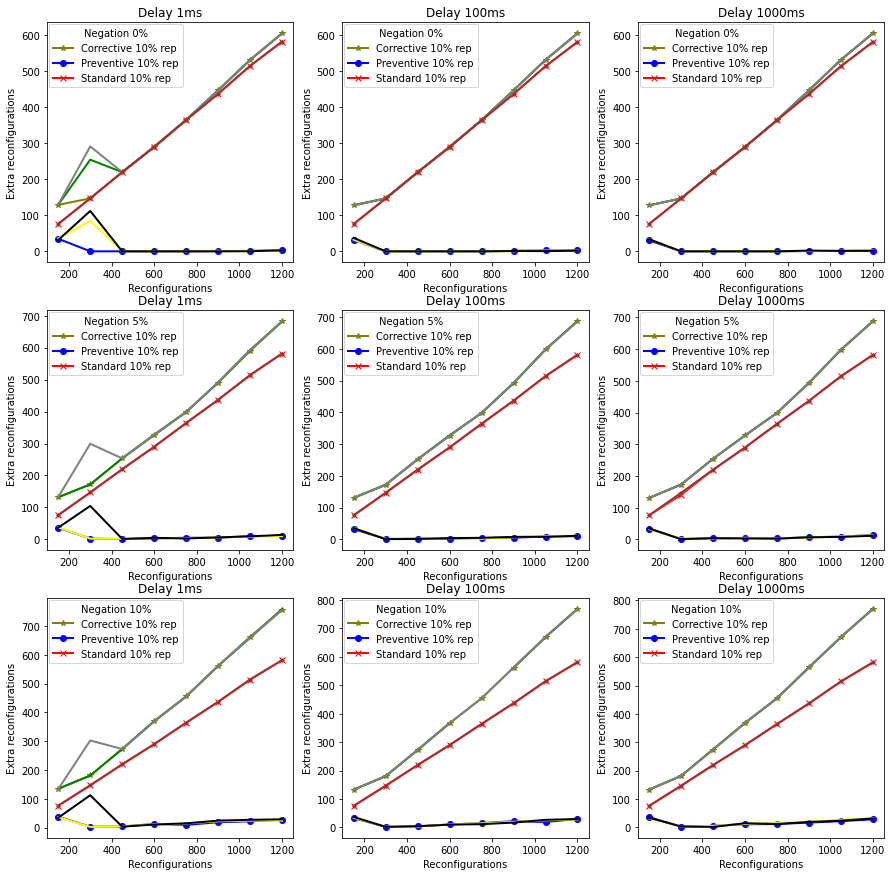

In [205]:
# line_labels = ['corrective 10rep', 'preventive 10rep', 'standard 10rep', 'corrective 5rep', 'preventive 5rep', 'standard 5rep', 'corrective 0rep', 'preventive 0rep', 'standard 0rep']
line_labels = ['Corrective 10% rep', 'Preventive 10% rep', 'Standard 10% rep']

print('Are equal?')
print(df_1000_10.equals(different_data_type))

fig, axs = plt.subplots(3, 3, figsize=(15,15))

axs[2, 0].plot('x_values', 'y_corrective_10', data=df_1_10, marker='*', color='olive', linewidth=2, label='corrective 10')
axs[2, 0].plot('x_values', 'y_preventive_10', data=df_1_10, marker='o', color='blue', linewidth=2, label='preventive 10')
axs[2, 0].plot('x_values', 'y_standard_10', data=df_1_10, marker='x', color='red', linewidth=2, label='standard 10')
axs[2, 0].plot('x_values', 'y_corrective_5', data=df_1_10, marker='', color='green', linewidth=2, label='corrective 5')
axs[2, 0].plot('x_values', 'y_preventive_5', data=df_1_10, marker='', color='yellow', linewidth=2, label='preventive 5')
axs[2, 0].plot('x_values', 'y_standard_5', data=df_1_10, marker='.', color='pink', linewidth=2, label='standard 5')
axs[2, 0].plot('x_values', 'y_corrective_0', data=df_1_10, marker='', color='grey', linewidth=2, label='corrective 0')
axs[2, 0].plot('x_values', 'y_preventive_0', data=df_1_10, marker='', color='black', linewidth=2, label='preventive 0')
axs[2, 0].plot('x_values', 'y_standard_0', data=df_1_10, marker='.', color='brown', linewidth=2, label='standard 0')
axs[2, 0].set_title('Delay 1ms')
axs[2, 0].legend(loc="upper left", borderaxespad=0.2,title='Negation 10%', labels=line_labels )

axs[2, 1].plot('x_values', 'y_corrective_10', data=df_100_10, marker='*', color='olive', linewidth=2, label='corrective 10')
axs[2, 1].plot('x_values', 'y_preventive_10', data=df_100_10, marker='o', color='blue', linewidth=2, label='preventive 10')
axs[2, 1].plot('x_values', 'y_standard_10', data=df_100_10, marker='x', color='red', linewidth=2, label='standard 10')
axs[2, 1].plot('x_values', 'y_corrective_5', data=df_100_10, marker='', color='green', linewidth=2, label='corrective 5')
axs[2, 1].plot('x_values', 'y_preventive_5', data=df_100_10, marker='', color='yellow', linewidth=2, label='preventive 5')
axs[2, 1].plot('x_values', 'y_standard_5', data=df_100_10, marker='.', color='pink', linewidth=2, label='standard 5')
axs[2, 1].plot('x_values', 'y_corrective_0', data=df_100_10, marker='', color='grey', linewidth=2, label='corrective 0')
axs[2, 1].plot('x_values', 'y_preventive_0', data=df_100_10, marker='', color='black', linewidth=2, label='preventive 0')
axs[2, 1].plot('x_values', 'y_standard_0', data=df_100_10, marker='.', color='brown', linewidth=2, label='standard 0')
axs[2, 1].set_title('Delay 100ms')
axs[2, 1].legend(loc="upper left", borderaxespad=0.2,title='Negation 10%', labels=line_labels )

axs[2, 2].plot('x_values', 'y_corrective_10', data=df_1000_10, marker='*', color='olive', linewidth=2, label='corrective 10')
axs[2, 2].plot('x_values', 'y_preventive_10', data=df_1000_10, marker='o', color='blue', linewidth=2, label='preventive 10')
axs[2, 2].plot('x_values', 'y_standard_10', data=df_1000_10, marker='x', color='red', linewidth=2, label='standard 10')
axs[2, 2].plot('x_values', 'y_corrective_5', data=df_1000_10, marker='', color='green', linewidth=2, label='corrective 5')
axs[2, 2].plot('x_values', 'y_preventive_5', data=df_1000_10, marker='', color='yellow', linewidth=2, label='preventive 5')
axs[2, 2].plot('x_values', 'y_standard_5', data=df_1000_10, marker='.', color='pink', linewidth=2, label='standard 5')
axs[2, 2].plot('x_values', 'y_corrective_0', data=df_1000_10, marker='', color='grey', linewidth=2, label='corrective 0')
axs[2, 2].plot('x_values', 'y_preventive_0', data=df_1000_10, marker='', color='black', linewidth=2, label='preventive 0')
axs[2, 2].plot('x_values', 'y_standard_0', data=df_1000_10, marker='.', color='brown', linewidth=2, label='standard 0')
axs[2, 2].set_title('Delay 1000ms')
axs[2, 2].legend(loc="upper left", borderaxespad=0.2,title='Negation 10%', labels=line_labels )


############################################################################################################################################
axs[1, 0].plot('x_values', 'y_corrective_10', data=df_1_5, marker='*', color='olive', linewidth=2, label='corrective 10')
axs[1, 0].plot('x_values', 'y_preventive_10', data=df_1_5, marker='o', color='blue', linewidth=2, label='preventive 10')
axs[1, 0].plot('x_values', 'y_standard_10', data=df_1_5, marker='x', color='red', linewidth=2, label='standard 10')
axs[1, 0].plot('x_values', 'y_corrective_5', data=df_1_5, marker='', color='green', linewidth=2, label='corrective 5')
axs[1, 0].plot('x_values', 'y_preventive_5', data=df_1_5, marker='', color='yellow', linewidth=2, label='preventive 5')
axs[1, 0].plot('x_values', 'y_standard_5', data=df_1_5, marker='.', color='pink', linewidth=2, label='standard 5')
axs[1, 0].plot('x_values', 'y_corrective_0', data=df_1_5, marker='', color='grey', linewidth=2, label='corrective 0')
axs[1, 0].plot('x_values', 'y_preventive_0', data=df_1_5, marker='', color='black', linewidth=2, label='preventive 0')
axs[1, 0].plot('x_values', 'y_standard_0', data=df_1_5, marker='.', color='brown', linewidth=2, label='standard 0')
axs[1, 0].set_title('Delay 1ms')
axs[1, 0].legend(loc="upper left", borderaxespad=0.2,title='Negation 5%', labels=line_labels )

axs[1, 1].plot('x_values', 'y_corrective_10', data=df_100_5, marker='*', color='olive', linewidth=2, label='corrective 10')
axs[1, 1].plot('x_values', 'y_preventive_10', data=df_100_5, marker='o', color='blue', linewidth=2, label='preventive 10')
axs[1, 1].plot('x_values', 'y_standard_10', data=df_100_5, marker='x', color='red', linewidth=2, label='standard 10')
axs[1, 1].plot('x_values', 'y_corrective_5', data=df_100_5, marker='', color='green', linewidth=2, label='corrective 5')
axs[1, 1].plot('x_values', 'y_preventive_5', data=df_100_5, marker='', color='yellow', linewidth=2, label='preventive 5')
axs[1, 1].plot('x_values', 'y_standard_5', data=df_100_5, marker='.', color='pink', linewidth=2, label='standard 5')
axs[1, 1].plot('x_values', 'y_corrective_0', data=df_100_5, marker='', color='grey', linewidth=2, label='corrective 0')
axs[1, 1].plot('x_values', 'y_preventive_0', data=df_100_5, marker='', color='black', linewidth=2, label='preventive 0')
axs[1, 1].plot('x_values', 'y_standard_0', data=df_100_5, marker='.', color='brown', linewidth=2, label='standard 0')
axs[1, 1].set_title('Delay 100ms')
axs[1, 1].legend(loc="upper left", borderaxespad=0.2,title='Negation 5%', labels=line_labels )

axs[1, 2].plot('x_values', 'y_corrective_10', data=df_1000_5, marker='*', color='olive', linewidth=2, label='corrective 10')
axs[1, 2].plot('x_values', 'y_preventive_10', data=df_1000_5, marker='o', color='blue', linewidth=2, label='preventive 10')
axs[1, 2].plot('x_values', 'y_standard_10', data=df_1000_5, marker='x', color='red', linewidth=2, label='standard 10')
axs[1, 2].plot('x_values', 'y_corrective_5', data=df_1000_5, marker='', color='green', linewidth=2, label='corrective 5')
axs[1, 2].plot('x_values', 'y_preventive_5', data=df_1000_5, marker='', color='yellow', linewidth=2, label='preventive 5')
axs[1, 2].plot('x_values', 'y_standard_5', data=df_1000_5, marker='.', color='pink', linewidth=2, label='standard 5')
axs[1, 2].plot('x_values', 'y_corrective_0', data=df_1000_5, marker='', color='grey', linewidth=2, label='corrective 0')
axs[1, 2].plot('x_values', 'y_preventive_0', data=df_1000_5, marker='', color='black', linewidth=2, label='preventive 0')
axs[1, 2].plot('x_values', 'y_standard_0', data=df_1000_5, marker='.', color='brown', linewidth=2, label='standard 0')
axs[1, 2].set_title('Delay 1000ms')
axs[1, 2].legend(loc="upper left", borderaxespad=0.2,title='Negation 5%', labels=line_labels )


############################################################################################################################################
axs[0, 0].plot('x_values', 'y_corrective_10', data=df_1_0, marker='*', color='olive', linewidth=2, label='corrective 10')
axs[0, 0].plot('x_values', 'y_preventive_10', data=df_1_0, marker='o', color='blue', linewidth=2, label='preventive 10')
axs[0, 0].plot('x_values', 'y_standard_10', data=df_1_0, marker='x', color='red', linewidth=2, label='standard 10')
axs[0, 0].plot('x_values', 'y_corrective_5', data=df_1_0, marker='', color='green', linewidth=2, label='corrective 5')
axs[0, 0].plot('x_values', 'y_preventive_5', data=df_1_0, marker='', color='yellow', linewidth=2, label='preventive 5')
axs[0, 0].plot('x_values', 'y_standard_5', data=df_1_0, marker='.', color='pink', linewidth=2, label='standard 5')
axs[0, 0].plot('x_values', 'y_corrective_0', data=df_1_0, marker='', color='grey', linewidth=2, label='corrective 0')
axs[0, 0].plot('x_values', 'y_preventive_0', data=df_1_0, marker='', color='black', linewidth=2, label='preventive 0')
axs[0, 0].plot('x_values', 'y_standard_0', data=df_1_0, marker='.', color='brown', linewidth=2, label='standard 0')
axs[0, 0].set_title('Delay 1ms')
axs[0, 0].legend(loc="upper left", borderaxespad=0.2,title='Negation 0%', labels=line_labels )


axs[0, 1].plot('x_values', 'y_corrective_10', data=df_100_0, marker='*', color='olive', linewidth=2, label='corrective 10')
axs[0, 1].plot('x_values', 'y_preventive_10', data=df_100_0, marker='o', color='blue', linewidth=2, label='preventive 10')
axs[0, 1].plot('x_values', 'y_standard_10', data=df_100_0, marker='x', color='red', linewidth=2, label='standard 10')
axs[0, 1].plot('x_values', 'y_corrective_5', data=df_100_0, marker='', color='green', linewidth=2, label='corrective 5')
axs[0, 1].plot('x_values', 'y_preventive_5', data=df_100_0, marker='', color='yellow', linewidth=2, label='preventive 5')
axs[0, 1].plot('x_values', 'y_standard_5', data=df_100_0, marker='.', color='pink', linewidth=2, label='standard 5')
axs[0, 1].plot('x_values', 'y_corrective_0', data=df_100_0, marker='', color='grey', linewidth=2, label='corrective 0')
axs[0, 1].plot('x_values', 'y_preventive_0', data=df_100_0, marker='', color='black', linewidth=2, label='preventive 0')
axs[0, 1].plot('x_values', 'y_standard_0', data=df_100_0, marker='.', color='brown', linewidth=2, label='standard 0')
axs[0, 1].set_title('Delay 100ms')
axs[0, 1].legend(loc="upper left", borderaxespad=0.2,title='Negation 0%', labels=line_labels )

axs[0, 2].plot('x_values', 'y_corrective_10', data=df_1000_0, marker='*', color='olive', linewidth=2, label='corrective 10')
axs[0, 2].plot('x_values', 'y_preventive_10', data=df_1000_0, marker='o', color='blue', linewidth=2, label='preventive 10')
axs[0, 2].plot('x_values', 'y_standard_10', data=df_1000_0, marker='x', color='red', linewidth=2, label='standard 10')
axs[0, 2].plot('x_values', 'y_corrective_5', data=df_1000_0, marker='', color='green', linewidth=2, label='corrective 5')
axs[0, 2].plot('x_values', 'y_preventive_5', data=df_1000_0, marker='', color='yellow', linewidth=2, label='preventive 5')
axs[0, 2].plot('x_values', 'y_standard_5', data=df_1000_0, marker='.', color='pink', linewidth=2, label='standard 5')
axs[0, 2].plot('x_values', 'y_corrective_0', data=df_1000_0, marker='', color='grey', linewidth=2, label='corrective 0')
axs[0, 2].plot('x_values', 'y_preventive_0', data=df_1000_0, marker='', color='black', linewidth=2, label='preventive 0')
axs[0, 2].plot('x_values', 'y_standard_0', data=df_1000_0, marker='.', color='brown', linewidth=2, label='standard 0')
axs[0, 2].set_title('Delay 1000ms')
axs[0, 2].legend(loc="upper left", borderaxespad=0.2,title='Negation 0%', labels=line_labels )



for ax in axs.flat:
    ax.set(xlabel='Reconfigurations', ylabel='Extra reconfigurations')

string_name = current_directory + file_path_images + 'result_number_of_inconsistencies_concurrent.png'
# string_name = current_directory + file_path_images + 'result_number_of_inconsistencies_concurrent.eps'

plt.savefig(string_name, format='png')